In [ ]:
!pip install -q rasterio


     |████████████████████████████████| 19.3 MB 1.2 MB/s 


In [ ]:
# Bibliotecas
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import reshape_as_raster
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


In [ ]:
# Lendo imagem como array
src = rio.open('/content/drive/MyDrive/Curso PDI com Python/LE07_L2SP_221071_20010720_SR_w.TIF')
b1 = src.read(1)
b2 = src.read(2)
b3 = src.read(3)
b4 = src.read(4)
b5 = src.read(5)
b7 = src.read(6)

img = np.dstack([b1,b2,b3,b4,b5,b7])

In [ ]:
type(img)

In [ ]:
# Armazenando metadados
meta = src.profile

In [ ]:
meta

In [ ]:
# Lendo classes
with rio.open('/content/drive/MyDrive/Curso PDI com Python/roi.tif') as src2:
  roi = src2.read(1)

In [ ]:
# Criando conjunto de treino
X = img[roi > 0]
y  = roi[roi > 0]

In [ ]:
img.shape

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
# Dividindo conjunto em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size = 0.3)

In [ ]:
# Instanciando o classificador
knn = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=10)

In [ ]:
img.shape[0]*img.shape[1]

1874160

In [ ]:
# Criando matriz com bandas em colunas
img2d = img.reshape(img.shape[0]*img.shape[1], img.shape[2])

# Rodando predição
pred_knn = knn.predict(img2d)

# Retornando para o formato original
pred_knn_final = pred_knn.reshape(img[:,:,0].shape)

In [ ]:
plt.imshow(img[:,:,4], cmap="gray")

In [ ]:
# Imagem classificada
plt.figure(figsize=(12,8))
plt.imshow(pred_knn_final, cmap='Spectral')

In [ ]:
# Calculando probabilidades
proba = knn.predict_proba(img2d)

In [ ]:
proba.shape

In [ ]:
# Retornando probabilidade para o formato da imagem
# O número de bandas DEVE ser igual ao número de classes
proba_reshape = proba.reshape(img.shape[0],img.shape[1],6)

In [ ]:
img.shape

In [ ]:
proba_reshape.shape

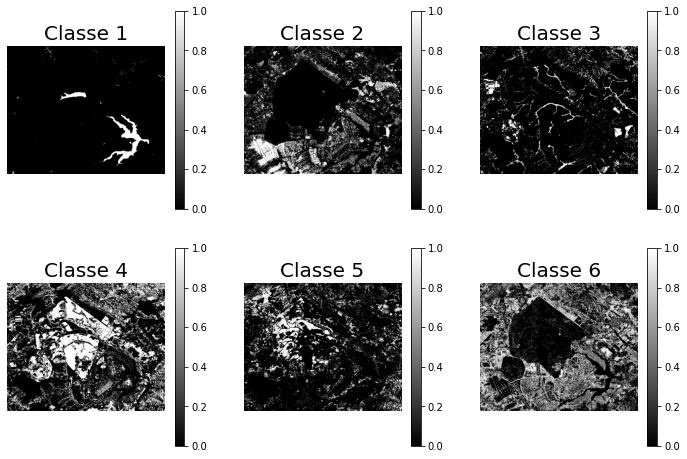

In [ ]:
# Visualizando probabilidades 
fig, ax = plt.subplots(2,3,figsize=(12,8))
ax = ax.ravel()

for i in range(proba_reshape.shape[2]):       
  im = ax[i].imshow(proba_reshape[:,:,i], cmap='gray')
  plt.colorbar(im, ax=ax[i])
  ax[i].set_title('Classe '+str(i+1),fontsize=20)
  ax[i].axis('off')

plt.show()

In [ ]:
proba_reshape[1000,200,:]

In [ ]:
proba_reshape[1000,1000,:]

array([0. , 0.3, 0. , 0. , 0.4, 0.3])

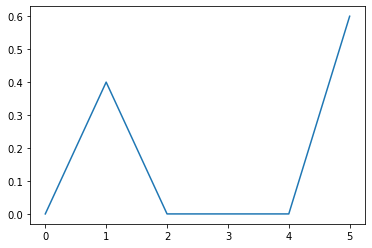

In [ ]:
plt.plot(proba_reshape[1200,400,:])

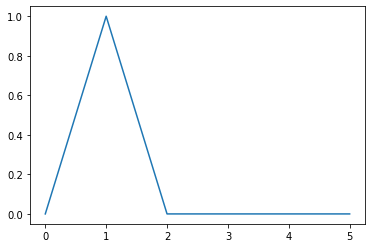

In [ ]:
plt.plot(proba_reshape[1000,200,:])

In [ ]:
meta

In [ ]:
# Gravando resultado em disco
proba_f = reshape_as_raster(proba_reshape)
with rio.open('predict_proba.tif', 'w', **meta) as src1:
    src1.write(proba_f)